In [19]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [30]:
data = pd.read_csv("preprocessing.csv", index_col=0)
data.head(10)

,Age,EdLevel,YearsExp,YearsProExp,PreviousSalary,NumSkills,Employed
0,0,4,7,4,51552,4,0
1,0,3,12,5,46482,12,1
2,0,4,15,6,77290,7,0
3,0,3,9,6,46135,13,0
4,1,5,40,30,160932,2,0
5,0,4,9,2,38915,5,0
6,1,4,26,18,77831,17,1
7,0,4,14,5,81319,4,0
8,1,3,39,21,68507,3,0
9,1,4,20,16,37752,6,0


In [31]:
df_x = data[["Age", "EdLevel", "YearsExp", "YearsProExp", "PreviousSalary", "NumSkills"]]
df_x['sum_exp']=df_x["YearsExp"]+df_x["YearsProExp"]
df_x.head(10)

,Age,EdLevel,YearsExp,YearsProExp,PreviousSalary,NumSkills,sum_exp,sal_per_skill
0,0,4,7,4,51552,4,11,12888.000000
1,0,3,12,5,46482,12,17,3873.500000
2,0,4,15,6,77290,7,21,11041.428571
3,0,3,9,6,46135,13,15,3548.846154
4,1,5,40,30,160932,2,70,80466.000000
5,0,4,9,2,38915,5,11,7783.000000
6,1,4,26,18,77831,17,44,4578.294118
7,0,4,14,5,81319,4,19,20329.750000
8,1,3,39,21,68507,3,60,22835.666667
9,1,4,20,16,37752,6,36,6292.000000


In [32]:
df_y = data[["Employed"]]
df_y.head(10)

,Employed
0,0
1,1
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [33]:
x_train, x_valid, y_train, y_valid = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

print(f"Data before splitting: {len(df_x)}")
print(f"Train data: {len(x_train)}")
print(f"Validation data: {len(x_valid)}")

Data before splitting: 73462
Train data: 58769
Validation data: 14693


In [34]:
EPOCH = 15
LEARNING_RATE = 1e-3

In [37]:
len_feature = len(df_x.columns)

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(5,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])
# col_train=["Age", "EdLevel", "YearsExp", "YearsProExp", "NumSkills", "sum_exp"]
col_train=["Age", "EdLevel", "YearsExp", "YearsProExp", "NumSkills", "sum_exp"]
history = model.fit(x_train[col_train], y_train, epochs=EPOCH, validation_data=(x_valid[col_train], y_valid))

Epoch 1/15
1837/1837 [==============================] - 4s 2ms/step - loss: 0.4991 - accuracy: 0.7481 - val_loss: 0.4574 - val_accuracy: 0.7779
Epoch 2/15
1837/1837 [==============================] - 3s 2ms/step - loss: 0.4575 - accuracy: 0.7754 - val_loss: 0.4502 - val_accuracy: 0.7798
Epoch 3/15
1837/1837 [==============================] - 3s 2ms/step - loss: 0.4532 - accuracy: 0.7792 - val_loss: 0.4503 - val_accuracy: 0.7821
Epoch 4/15
1837/1837 [==============================] - 3s 2ms/step - loss: 0.4504 - accuracy: 0.7797 - val_loss: 0.4462 - val_accuracy: 0.7804
Epoch 5/15
1837/1837 [==============================] - 3s 2ms/step - loss: 0.4493 - accuracy: 0.7810 - val_loss: 0.4451 - val_accuracy: 0.7824
Epoch 6/15
1837/1837 [==============================] - 4s 2ms/step - loss: 0.4484 - accuracy: 0.7812 - val_loss: 0.4495 - val_accuracy: 0.7806
Epoch 7/15
1837/1837 [==============================] - 4s 2ms/step - loss: 0.4480 - accuracy: 0.7823 - val_loss: 0.4510 - val_accuracy:

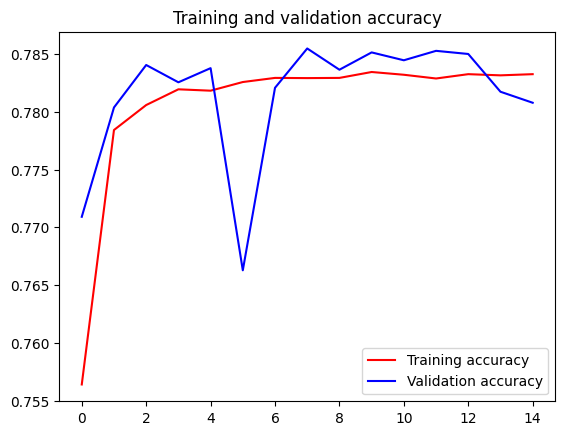

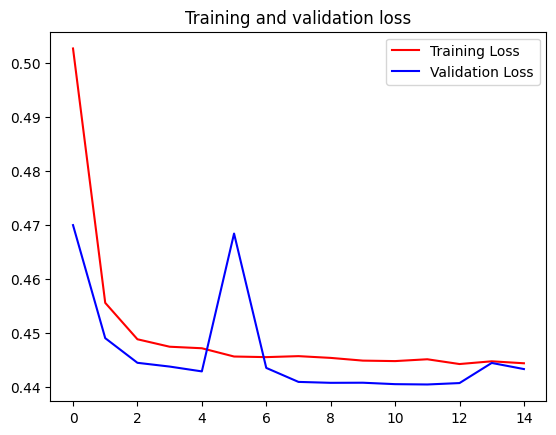

In [28]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
model.predict([[1,0,1,0,1,0,0,1,0,1,0,4,1,0.14,0.08,0.230139,0.037383]])

ValueError: in user code:

    File "/home/vincentius/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/home/vincentius/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/vincentius/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/home/vincentius/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/home/vincentius/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/vincentius/.local/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 5, but received input with shape (None, 17)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 17), dtype=float32)
      • training=False
      • mask=None
